## Sequence Prediction using RNN

In this exercise, we try to predict values of a curve given earlier data points.

We will formulate our problem like this – given a sequence of 50 numbers belonging to a sine wave, predict the 51st number in the series

In [4]:
!pip install keras tensorflow
#!pip install keras tensorflow==1.5

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in /sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.6/site-packages (1.16.3)
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model      # type de modele
from keras.layers import Dense                       # Fully Connected Layers
from keras.optimizers import Adam
from keras import layers
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


What does our network model expect the data to be like? It would accept a single sequence of length 50 as input. So the shape of the input data will be:

(number_of_records x length_of_sequence x types_of_sequences)

Here, types_of_sequences is 1, because we have only one type of sequence – the sine wave.

On the other hand, the output would have only one value for each record. This will of course be the 51st value in the input sequence. So its shape would be:

(number_of_records x types_of_sequences) # where types_of_sequences is 1

-----------------------------------

fix random seed for reproducibility of the results (hint: `random`)

In [7]:
from pprint import pprint

In [8]:
# fix random seed for reproducibility (may not be necessary with Keras?)
r = random.seed(42)
print(random.random)

<built-in method random_sample of mtrand.RandomState object at 0x118d8e630>


Create the sine wave data and visualize it (hint: `math.sin(x)` for values ranging from 0 to 200)

Data should be stored in a numpy array of 200 values.

In [9]:
l= list(range(0,201))
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [10]:
sin_wave = []
for i in range(0, 200) :
    sin_wave.append(math.sin(i))
    
print(sin_wave)

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893699, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571169, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.836655638536056, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796028, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569994, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.9537526

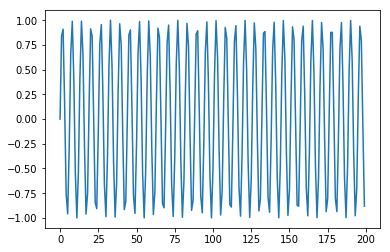

In [11]:

plt.plot(sin_wave)

Visualize a sequence of only 50, for example the 50 first values of the calculated sine wave.

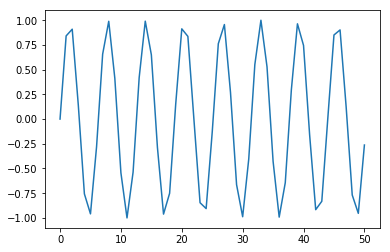

In [12]:
plt.plot(sin_wave[:51])

We will first set up the training data:

X should be an array of 100 sequences, that is, an array of arrays.

Y should be an array of 100 outputs, that is, for each input sequence, the value that follows the sequence.

hint: `X.append`, `Y.append`

Note that we loop for `num_records – 50` because we want to set aside the last 50 records as our validation data. 

In [13]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len
print(num_records)
for i in range(num_records - 50):
    X.append(sin_wave[i: i+seq_len])
    Y.append(sin_wave[i+seq_len])



150


In [14]:
print(X[:2])

[[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893699, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571169, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.836655638536056, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796028, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569994, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.953752

In [15]:
for i in range (0,30 ) :
    print(str(X[i]), " -> ", str(Y[i]))
    

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893699, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571169, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.836655638536056, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796028, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569994, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.9537526

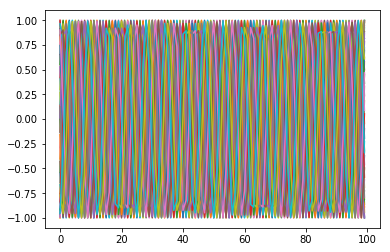

In [16]:
plt.plot(X)

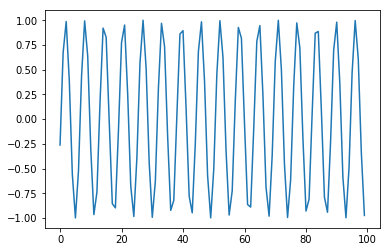

In [17]:
plt.plot(Y)

If we plot the data we can check that X(t) is Y(t-1)

Print the shape of the data: 

X should be an array of 100 sequences of 50.

Y should be an array of 100 values.

hint: `shape`

In [18]:
X = np.array(X)
print(X.shape)

(100, 50)


In [19]:
Y = np.array(Y)
print(Y.shape)

(100,)


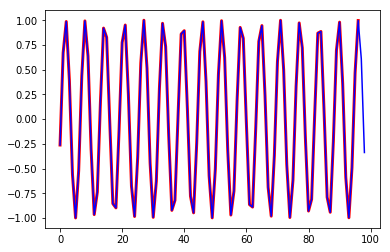

In [20]:
plt.plot( X[1:98,49], 'r' , linewidth=3)
plt.plot( Y[0:99], 'b')

We reshape the data because we need one more dimension for the model

In [21]:
X = X.reshape(1, 100, 50)
Y = Y.reshape(1, 100)

In [22]:
print(X.shape)
print(Y.shape)

(1, 100, 50)
(1, 100)


Now, in a similar way to what we did with the training data, we setup the validation data:



In [23]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(l[i:(i+seq_len)])
    Y_val.append(sin_wave[i+seq_len])

#T = 50                   # length of sequence

#output_dim = 1



In [24]:
X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_val.shape, Y_val.shape

((50, 50), (50,))

Now we can instantiate a Keras model:

In [25]:
#definition of the model
model = Sequential()
model.add(LSTM(units = 3,input_shape=(None, 50)))
model.add(Dense(100))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 648       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               400       
Total params: 1,048
Trainable params: 1,048
Non-trainable params: 0
_________________________________________________________________


Then we can test the model with only 20 iterations:

In [ ]:
model.fit(X, Y, epochs=20, batch_size=1 )

Get the predictions and plot them.

Hint `model.predict`

In [ ]:
prediction = 
print(shape(prediction))
plt.plot(, 'g')
plt.plot( , 'r')
plt.show()

We can see that the model is learning, but we need more iterations for a better fit.

Test the model with 500 epochs.

Plot the new predictions: there should be a better fit now:

In [ ]:
prediction = 
print(shape(prediction))
plt.plot(, 'g')
plt.plot(, 'r')
plt.show()

Now, instead of working with training data, we can make predictions on the validation data:

In [ ]:
# make predictions
testPredict = 
print(shape(testPredict))


Calculate root mean squared error for the training and the validation data.

We expect the error to be very low on the training data, and a bit less low for the validation data.

Hint: `sklearn.metrics.mean_squared_error`

In [ ]:
# calculate root mean squared error
trainScore = 
print('Train Score: %.2f RMSE' % (trainScore))
testScore = 
print('Test Score: %.2f RMSE' % (testScore))

We plot the validation data to check if there is overfitting

In [ ]:
plt.plot(  , 'g')
plt.plot(  , 'r')
plt.show()

Great that's look pretty good....We can check with a clean model and less epochs and see....

Could also try with a different series, for example a square wave?